# Pipeline of Model Trainer 
1. Do clustering 
2. Train model and test it 

In [1]:
# Importing Required Libraries 
import os, sys
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator


In [2]:
# Clustering on data 
df = pd.read_csv("D:\Projects_new\Stores_Sales_Prediction\Juypter Notebook\Processod_data.csv")

In [3]:
df['Outlet_Size'] = df['Outlet_Size'].apply(lambda x : round(x,0))

In [4]:
data = df.copy()

In [5]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[76410968344.13144,
 37714942516.2593,
 27272418530.06307,
 21158496642.91055,
 15700201598.045494,
 13707429254.014542,
 11937341743.320385,
 10370939676.144354,
 8959765598.497227,
 8175849019.673341]

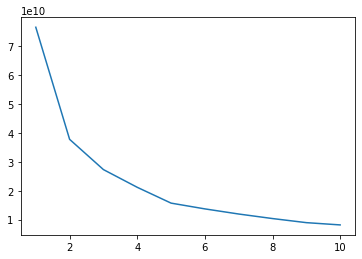

In [7]:
plt.plot(range(1,11),wcss)

! pip install kneed

In [8]:
kn = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [9]:
Total_cluster = kn.knee

In [10]:
kmean = KMeans(n_clusters=Total_cluster,random_state=42)
cluster = kmean.fit_predict(data)
data['cluster'] = cluster

In [11]:
data['cluster'].unique()

array([1, 2, 0])

In [12]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [13]:
data

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,-0.808326,-1.111358,1.747454,-0.139541,1.0,0.0,1.0,0.0,1.0,3735.1380,1
1,-1.581672,-1.045067,-1.489023,-1.334103,0.0,2.0,1.0,2.0,2.0,443.4228,1
2,1.067837,-1.096733,0.010040,-0.139541,1.0,0.0,1.0,0.0,1.0,2097.2700,1
3,1.456798,-0.083740,0.660050,-0.020085,1.0,2.0,2.0,2.0,0.0,732.3800,1
4,-0.892983,-0.083740,-1.399220,1.293934,2.0,1.0,0.0,2.0,1.0,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.365456,-0.275551,1.180783,1.293934,1.0,0.0,0.0,2.0,1.0,2778.3834,0
8519,-1.018823,-0.476643,-0.527301,-0.497909,1.0,2.0,1.0,1.0,1.0,549.2850,0
8520,-0.510886,-0.718672,-0.897208,-0.736822,2.0,1.0,2.0,1.0,1.0,1193.1136,0
8521,-1.286519,1.538968,-0.607977,-1.334103,1.0,2.0,1.0,2.0,2.0,1845.5976,0


In [14]:
data['Item_Outlet_Sales']
# X = data.drop(['Item_Outlet_Sales','cluster'],axis=1)
X_with_cluster = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']

In [16]:
X_with_cluster

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,cluster
0,-0.808326,-1.111358,1.747454,-0.139541,1.0,0.0,1.0,0.0,1.0,1
1,-1.581672,-1.045067,-1.489023,-1.334103,0.0,2.0,1.0,2.0,2.0,1
2,1.067837,-1.096733,0.010040,-0.139541,1.0,0.0,1.0,0.0,1.0,1
3,1.456798,-0.083740,0.660050,-0.020085,1.0,2.0,2.0,2.0,0.0,1
4,-0.892983,-0.083740,-1.399220,1.293934,2.0,1.0,0.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
8518,-1.365456,-0.275551,1.180783,1.293934,1.0,0.0,0.0,2.0,1.0,0
8519,-1.018823,-0.476643,-0.527301,-0.497909,1.0,2.0,1.0,1.0,1.0,0
8520,-0.510886,-0.718672,-0.897208,-0.736822,2.0,1.0,2.0,1.0,1.0,0
8521,-1.286519,1.538968,-0.607977,-1.334103,1.0,2.0,1.0,2.0,2.0,0


In [18]:
8523*0.2

1704.6000000000001

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.20, random_state=42)

In [81]:
# X_without Cluster 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
r

0.5237811906465029

In [18]:
# X_with Cluster 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
r

0.619392838001253

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

r = r2_score(y_test,y_pred)
r

0.7399439409840962

In [19]:
# X_with Cluster 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

r = r2_score(y_test,y_pred)
r

0.740572566334619

In [22]:
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(RandomForestRegressor(),X,y,cv=5)


In [23]:
scoresrf

array([0.73280451, 0.77341576, 0.65346312, 0.76700713, 0.67536219])

In [24]:
for i in scoresrf:
    print(round(i,2))
print(f'Average score {round(scoresrf.mean(),2)}')

0.73
0.77
0.65
0.77
0.68
Average score 0.72


In [25]:
scoreslr = cross_val_score(LinearRegression(),X,y,cv=5)

In [26]:
for i in scoreslr:
    print(round(i,2))
print(f'Average score {round(scoreslr.mean(),2)}')

0.59
0.57
0.6
0.65
0.48
Average score 0.58


In [32]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

r = r2_score(y_test,y_pred)
r

0.7311328328610374

In [28]:
a = [i/100 for i in range(1,10)]
a

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [31]:
best_params = {'alpha': 0.1,
 'colsample_bytree': 0.82,
 'eta': 0.01,
 'gamma': 0.1,
 'max_depth': 4,
 'n_estimators': 65,
 'subsample': 0.9}


eta=best_params['eta']
max_depth=best_params['max_depth']
gamma=best_params['gamma']
subsample=best_params['subsample']
colsample_bytree=best_params['colsample_bytree']
alpha=best_params['eta']
n_estimators=best_params['n_estimators']

model=XGBRegressor(objective='reg:squarederror', eta=eta, max_depth=max_depth,  gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree, alpha=alpha, n_estimators=n_estimators)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

0.09989947464797633

In [ ]:

pramrf = {'n_estimators':range(10,100,5),
        'criterion':["squared_error", "absolute_error"],
       'max_depth':range(3,10,1),
        'max_features':[i/100.0 for i in range(70,100,3)],
        'max_samples':[i/100.0 for i in range(70,100,5)]
       }

pramxg = {'eta' : [i/100 for i in range(1,10)],
          'max_depth' : range(3,10,1),
          'gamma' : [i/10 for i in range(1,10)],
          'subsample':[i/100.0 for i in range(70,100,5)],
          'colsample_bytree':[i/100.0 for i in range(70,100,3)],
          'alpha' : np.arange(0.1, 10, 0.1),
          'n_estimators':range(10,100,5)
          }



In [ ]:

gridxg  = GridSearchCV(XGBRegressor(objective='reg:squarederror'), paramxg, cv=5, n_jobs=-1)
gridxg.fit(X_train,y_train)
gridxg.best_params_

In [ ]:

gridrf  = GridSearchCV(RandomForestRegressor(), paramrf, cv=5, n_jobs=-1)
gridrf.fit(X_train,y_train)
gridrf.best_params_

In [36]:
best_paramsRF = {'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 0.79,
 'max_samples': 0.7,
 'n_estimators': 75}

best_paramsXG = {'alpha': 0.1,
 'colsample_bytree': 0.82,
 'eta': 0.01,
 'gamma': 0.1,
 'max_depth': 4,
 'n_estimators': 65,
 'subsample': 0.9}

In [49]:
eta=best_paramsXG['eta']
max_depth=best_paramsXG['max_depth']
gamma=best_paramsXG['gamma']
subsample=best_paramsXG['subsample']
colsample_bytree=best_paramsXG['colsample_bytree']
alpha=best_paramsXG['eta']
n_estimators=best_paramsXG['n_estimators']

model=XGBRegressor(objective='reg:squarederror', eta=eta, max_depth=max_depth,  gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree, alpha=alpha, n_estimators=n_estimators,booster="gblinear")
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

[16:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE: 1219.48


In [50]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

r = r2_score(y_test,y_pred)
print(f'r2 score : {r}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 score : 0.7311328328610374
RMSE: 854.85


In [52]:
criterion=best_paramsRF['criterion']
max_depth=best_paramsRF['max_depth']
max_features=best_paramsRF['max_features']
max_samples=best_paramsRF['max_samples']
n_estimators=best_paramsRF['n_estimators']



best_paramsRF = {'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 0.79,
 'max_samples': 0.7,
 'n_estimators': 75}


model=RandomForestRegressor(criterion=criterion, max_depth = max_depth, max_features = max_features, max_samples = max_samples, n_estimators = n_estimators)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 score : 0.7616947078584819
RMSE: 804.80


In [62]:
X_train

array([[-0.81853286, -0.97073217,  1.74745381, ..., -0.42915412,
        -1.36933384, -0.25265831],
       [-1.59119397, -0.90811123, -1.48902325, ..., -0.42915412,
         1.09156913,  1.00297245],
       [ 1.05597041, -0.95691733,  0.01004021, ..., -0.42915412,
        -1.36933384, -0.25265831],
       ...,
       [-0.52135551, -0.59978449, -0.89720755, ...,  0.89801589,
        -0.13888236, -0.25265831],
       [-1.2963026 ,  1.53287976, -0.60797692, ..., -0.42915412,
         1.09156913,  1.00297245],
       [ 0.43875592, -0.41193591, -1.05226104, ...,  0.89801589,
        -1.36933384, -0.25265831]])

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

r = r2_score(y_test,y_pred)
r

print(f'r2 score : {r}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 score : 0.7428021644699656
RMSE: 836.10


In [58]:
a = [i/10 for i in range(1,5)]
a

[0.1, 0.2, 0.3, 0.4]

In [56]:
from sklearn.model_selection import GridSearchCV
params1 = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}



xgbr = XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train,y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Lowest RMSE:  838.0135756035144


In [57]:
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01,
                  'max_depth': 6, 'n_estimators': 500}

model=XGBRegressor(objective='reg:squarederror',  max_depth=6, colsample_bytree=0.7, n_estimators=500,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 score : 0.7639040495562206
RMSE: 801.06


In [21]:
# X_with Cluster 
from xgboost import XGBRegressor

model=XGBRegressor(objective='reg:squarederror',  max_depth=6, colsample_bytree=0.7, n_estimators=500,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 score : 0.7639040495562206
RMSE: 801.06


In [2]:
import numpy as np
def load_numpy_array_data(file_path: str) -> np.array:
    with open(file_path, 'rb') as file_obj:
            return np.load(file_obj)

In [56]:
train_array = load_numpy_array_data(r"D:\Projects_new\Stores_Sales_Prediction\sales\artifact\data_transformation\2022-07-24-21-30-09\transformed_data\train\train.npz")
test_array = load_numpy_array_data(r"D:\Projects_new\Stores_Sales_Prediction\sales\artifact\data_transformation\2022-07-24-21-30-09\transformed_data\test\test.npz")

In [55]:
pd.DataFrame(train_array[:,:-1])

,0,1,2,3,4,5,6,7,8
0,-0.818533,-0.970732,1.747454,-0.139541,-0.179795,-0.997813,-0.429154,-1.369334,-0.252658
1,-1.591194,-0.908111,-1.489023,-1.334103,-2.095286,1.236942,-0.429154,1.091569,1.002972
2,1.055970,-0.956917,0.010040,-0.139541,-0.179795,-0.997813,-0.429154,-1.369334,-0.252658
3,1.444587,-1.281758,0.660050,-0.020085,-0.179795,1.236942,-1.756324,1.091569,-1.508289
4,-0.903114,-1.281758,-1.399220,1.293934,1.735696,0.119565,-1.756324,1.091569,-0.252658
...,...,...,...,...,...,...,...,...,...
8518,-1.375169,-0.181193,1.180783,1.293934,-0.179795,-0.997813,-1.756324,1.091569,-0.252658
8519,-1.028843,-0.371154,-0.527301,-0.497909,-0.179795,1.236942,0.898016,-0.138882,-0.252658
8520,-0.521356,-0.599784,-0.897208,-0.736822,1.735696,0.119565,0.898016,-0.138882,-0.252658
8521,-1.296303,1.532880,-0.607977,-1.334103,-0.179795,1.236942,-0.429154,1.091569,1.002972


In [57]:
X_train,y_train,X_test,y_test = train_array[:,:-1],train_array[:,-1],test_array[:,:-1],test_array[:,-1]

In [58]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [60]:
X_train.shape

(8523, 9)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model=RandomForestRegressor(criterion='absolute_error', max_depth = 7, max_features = 0.79, max_samples = 0.7, n_estimators = 75)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 score : 0.0
RMSE: 2483.00


In [13]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
train_array

array([[ 1.79891378, -1.13513761, -0.53203517, ..., -1.36933384,
        -0.25265831,  0.        ],
       [-1.04713082, -0.5369602 , -0.86192009, ..., -0.13888236,
        -0.25265831,  0.        ],
       [ 0.39303632,  0.64818319,  1.61809429, ...,  1.09156913,
        -1.50828907,  0.        ],
       ...,
       [-0.65851429,  0.14335811, -0.35728725, ..., -0.13888236,
        -0.25265831,  0.        ],
       [ 0.5530549 , -1.28175775,  1.18238875, ..., -0.13888236,
        -0.25265831,  0.        ],
       [-0.77281327,  0.74790727, -0.98274279, ..., -0.13888236,
        -0.25265831,  0.        ]])

In [35]:
X

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,cluster
0,-0.808326,-1.111358,1.747454,-0.139541,1.0,0.0,1.0,0.0,1.0,1
1,-1.581672,-1.045067,-1.489023,-1.334103,0.0,2.0,1.0,2.0,2.0,1
2,1.067837,-1.096733,0.010040,-0.139541,1.0,0.0,1.0,0.0,1.0,1
3,1.456798,-0.083740,0.660050,-0.020085,1.0,2.0,2.0,2.0,0.0,1
4,-0.892983,-0.083740,-1.399220,1.293934,2.0,1.0,0.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
8518,-1.365456,-0.275551,1.180783,1.293934,1.0,0.0,0.0,2.0,1.0,0
8519,-1.018823,-0.476643,-0.527301,-0.497909,1.0,2.0,1.0,1.0,1.0,0
8520,-0.510886,-0.718672,-0.897208,-0.736822,2.0,1.0,2.0,1.0,1.0,0
8521,-1.286519,1.538968,-0.607977,-1.334103,1.0,2.0,1.0,2.0,2.0,0


In [39]:
df = pd.DataFrame(train_array,columns=X.columns)
df

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,cluster
0,1.798914,-1.135138,-0.532035,-0.139541,-0.179795,-0.997813,-0.429154,-1.369334,-0.252658,0.0
1,-1.047131,-0.536960,-0.861920,-1.095190,-0.179795,1.236942,0.898016,-0.138882,-0.252658,0.0
2,0.393036,0.648183,1.618094,-0.020085,1.735696,0.119565,-1.756324,1.091569,-1.508289,0.0
3,-1.272300,-0.983503,0.225484,-1.095190,-0.179795,-0.997813,0.898016,-0.138882,-0.252658,0.0
4,0.186917,1.016910,1.497272,1.532846,-0.179795,1.236942,-0.429154,1.091569,2.258603,0.0
...,...,...,...,...,...,...,...,...,...,...
5676,-0.544215,-1.020172,0.005181,0.099372,-0.179795,1.236942,0.898016,-1.369334,-0.252658,0.0
5677,-1.207149,1.489663,0.452086,-1.334103,-0.179795,1.236942,-0.429154,1.091569,1.002972,0.0
5678,-0.658514,0.143358,-0.357287,-0.497909,1.735696,0.119565,0.898016,-0.138882,-0.252658,0.0
5679,0.553055,-1.281758,1.182389,-1.095190,-0.179795,1.236942,0.898016,-0.138882,-0.252658,0.0


In [40]:
df.drop(['cluster'],inplace=True,axis=1)

In [41]:
df

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.798914,-1.135138,-0.532035,-0.139541,-0.179795,-0.997813,-0.429154,-1.369334,-0.252658
1,-1.047131,-0.536960,-0.861920,-1.095190,-0.179795,1.236942,0.898016,-0.138882,-0.252658
2,0.393036,0.648183,1.618094,-0.020085,1.735696,0.119565,-1.756324,1.091569,-1.508289
3,-1.272300,-0.983503,0.225484,-1.095190,-0.179795,-0.997813,0.898016,-0.138882,-0.252658
4,0.186917,1.016910,1.497272,1.532846,-0.179795,1.236942,-0.429154,1.091569,2.258603
...,...,...,...,...,...,...,...,...,...
5676,-0.544215,-1.020172,0.005181,0.099372,-0.179795,1.236942,0.898016,-1.369334,-0.252658
5677,-1.207149,1.489663,0.452086,-1.334103,-0.179795,1.236942,-0.429154,1.091569,1.002972
5678,-0.658514,0.143358,-0.357287,-0.497909,1.735696,0.119565,0.898016,-0.138882,-0.252658
5679,0.553055,-1.281758,1.182389,-1.095190,-0.179795,1.236942,0.898016,-0.138882,-0.252658
